In [1]:
import GCRCatalogs
from clevar import ClCatalog, MemCatalog
from clevar.match import MembershipMatch, get_matched_pairs
from clevar.match import output_matched_catalog
import clevar
clevar.__version__

'0.13.5'

In [2]:
import sys
sys.path.append('../')
from cluster_validation.plotting_functions import *


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 

matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.figsize': (10,8)})

# 1 - opening catalogs

In [4]:
gc_truth = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image' )

In [5]:
cosmo = gc_truth.cosmology

In [6]:
min_richness = 5
min_halo_mass = 1e13 #Msun

### match with MFoF cut

In [7]:
RM_cat = ClCatalog.read('RM_cat_richness_min_'+str(min_richness)+'.fits', name='RM_cat', full=True)

In [8]:
halo_cat = ClCatalog.read('halo_cat_mass_min_'+f"{min_halo_mass:1.2e}"+'.fits', name='halo_cat', full=True)

### match with MFoF cut

In [9]:
RM_cat._init_match_vals(True)
halo_cat._init_match_vals(True)

In [10]:
mt = MembershipMatch()

In [11]:
mt.load_matches(RM_cat, halo_cat, out_dir='cosmoDC2_RM_match_cross_membership')

RM_cat
    * ClEvar used in matching: 0.13.5
 * Total objects:    45,081
 * multiple (self):  43,211
 * multiple (other): 43,211
 * unique (self):    42,973
 * unique (other):   42,825
 * cross:            42,754

halo_cat
    * ClEvar used in matching: 0.13.5
 * Total objects:    278,904
 * multiple (self):  75,514
 * multiple (other): 75,514
 * unique (self):    42,825
 * unique (other):   42,973
 * cross:            42,754


In [12]:
RM_cat_bij, halo_cat_bij = get_matched_pairs(RM_cat, halo_cat, 'cross')

In [13]:
#version with SkySim M200c information added manually
halo_cat_bij_ss = ClCatalog.read_full('cosmoDC2_RM_match_cross_membership/halo_cat_bij_ss.fits')

    * ClEvar used in matching: 0.13.5


In [14]:
RM_cat_bij.size, RM_cat_bij.size/RM_cat.size,  halo_cat_bij_ss.size/halo_cat.size

(42754, 0.9483818016459262, 0.15329288930958324)

# 2 - Redshift recovery metrics

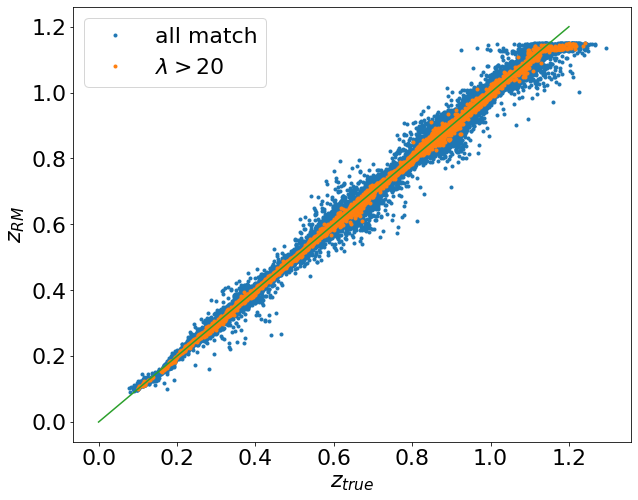

In [15]:
cond_mt = RM_cat_bij["richness"]>20

plt.plot(halo_cat_bij_ss['z'], RM_cat_bij['z'],'.',  label='all match')
plt.plot(halo_cat_bij_ss['z'][cond_mt], RM_cat_bij['z'][cond_mt],'.',   label='$\lambda>20$');
plt.ylabel('$z_{RM}$')
plt.xlabel('$z_{true}$')

plt.plot((0.,1.2),(0.,1.2))

plt.legend()

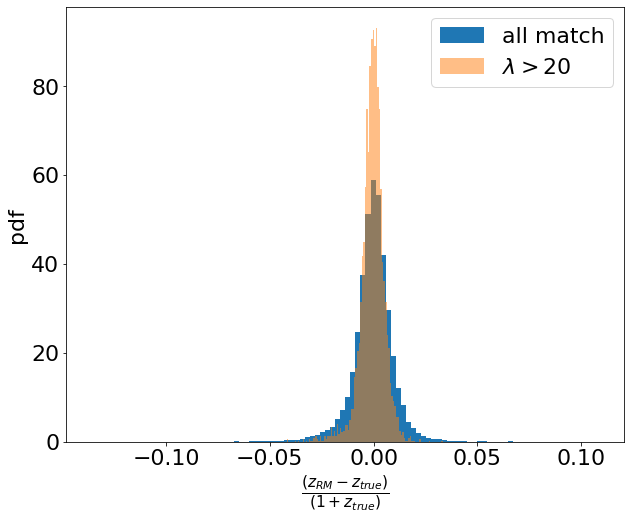

In [16]:
plt.hist((RM_cat_bij['z']- halo_cat_bij_ss['z'])/(1+halo_cat_bij_ss['z']), bins=100, density=True, label='all match');
plt.hist((RM_cat_bij['z']- halo_cat_bij_ss['z'])[cond_mt]/(1+halo_cat_bij_ss['z'])[cond_mt], bins=100, density=True, alpha=0.5, label='$\lambda>20$');

plt.xlabel('$\\frac{(z_{RM}-z_{true})}{(1+z_{true})}$')
plt.ylabel('pdf')

plt.legend()

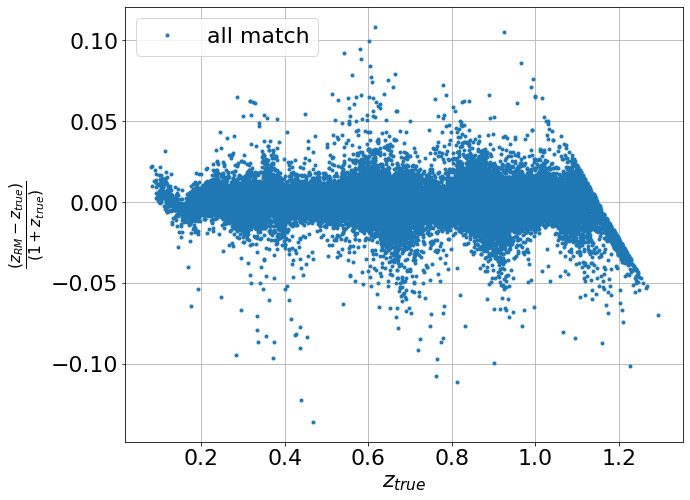

In [25]:
plt.plot(halo_cat_bij['z'], (RM_cat_bij['z']-halo_cat_bij_ss['z'])/(1+halo_cat_bij_ss['z']),'.',  label='all match')

plt.xlabel('$z_{true}$')
plt.ylabel('$\\frac{(z_{RM}-z_{true})}{(1+z_{true})}$');
plt.grid()
plt.legend()

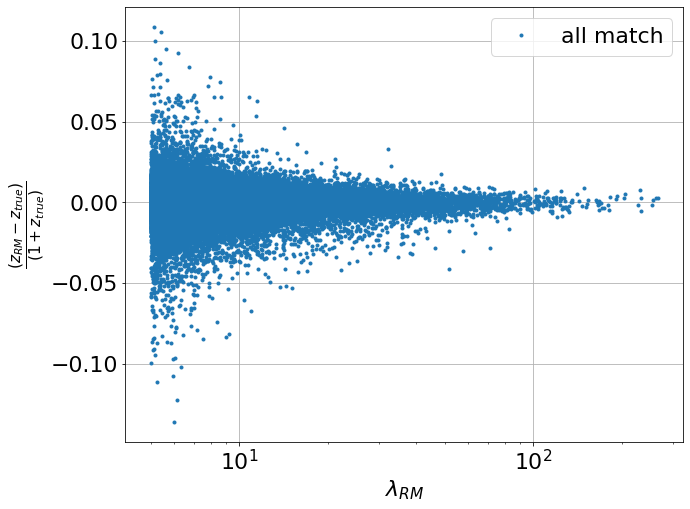

In [26]:
plt.plot(RM_cat_bij['richness'], (RM_cat_bij['z']-halo_cat_bij_ss['z'])/(1+halo_cat_bij_ss['z']),'.',  label='all match')

plt.xscale('log')
plt.xlabel('$\\lambda_{RM}$')
plt.ylabel('$\\frac{(z_{RM}-z_{true})}{(1+z_{true})}$');
plt.grid()
plt.legend()

In [27]:
quant_z_mean, quant_zbias_mean, quant_zbias_std  = running_stats(halo_cat_bij_ss['z'], (RM_cat_bij['z']-halo_cat_bij_ss['z'])/(1+halo_cat_bij_ss['z']),\
                                                         xmin=0, xmax=1.2, xstep=0.05)

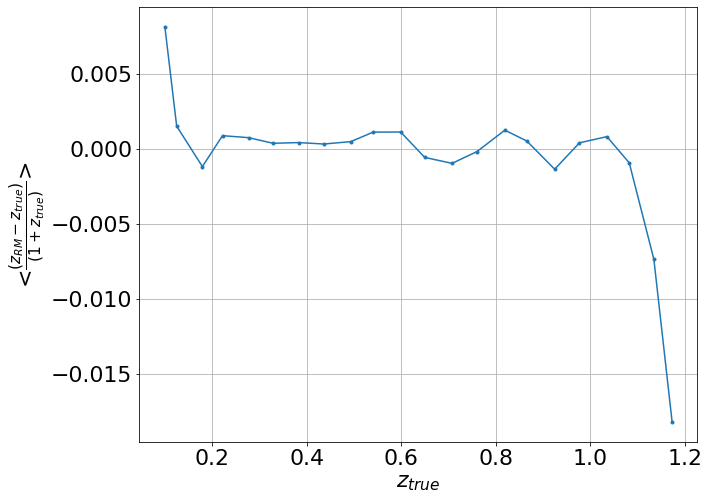

In [28]:
plt.plot(quant_z_mean, quant_zbias_mean, '.-')
plt.grid()
plt.xlabel('$z_{true}$')
plt.ylabel('<$\\frac{(z_{RM}-z_{true})}{(1+z_{true})}} $>');

In [29]:
quant_logrich_mean, quant_zscat_mean, quant_zscat_std  = running_stats(np.log10(RM_cat_bij['richness']), (RM_cat_bij['z']-halo_cat_bij_ss['z'])/(1+halo_cat_bij_ss['z']),\
                                                         xmin=0.7, xmax=2.5, xstep=0.1)

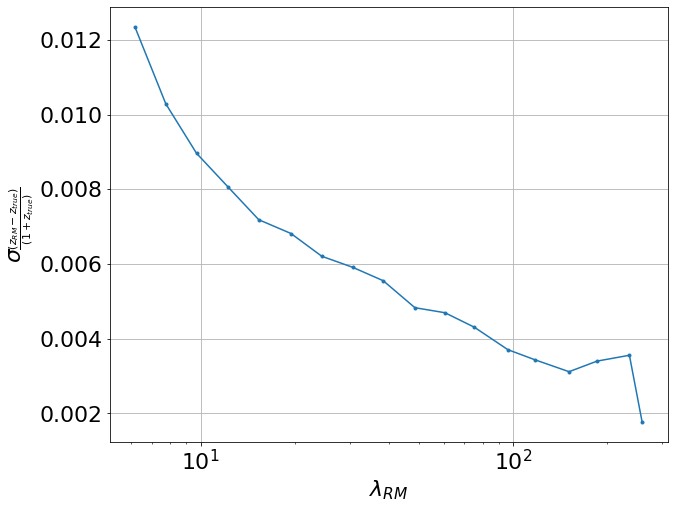

In [30]:
plt.plot(10**quant_logrich_mean, quant_zscat_std , '.-')
plt.grid()
plt.xscale('log')

plt.xlabel('$\\lambda_{RM}$')
plt.ylabel('$\\sigma_{ \\frac{(z_{RM}-z_{true})}{(1+z_{true})}}$');